Link to my Pronopto: https://pitt.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=491f73a6-66b1-4e72-9e1b-af67005c5a0b

# Python Final Project
## Rahul Tiwari

### Imoprting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score,accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import datetime

#### Importing Data

In [2]:
df = pd.read_csv('C:\\Users\\dell\\Downloads\\HPS_Week51_PUF_CSV\\pulse2022_puf_51.csv')
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,...,FRMLA_TYP4,GAS1,GAS2,GAS3,GAS4,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,SUMMER_ED5
0,V510000001,51,34,35620.0,1,1443.711630,5636.201993,1973,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
1,V510000002,51,8,NaN,4,972.449233,952.102570,1945,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88
2,V510000003,51,51,47900.0,2,110.034986,211.642852,1975,2,1,...,-88,-99,-99,-99,1,-99,-99,-99,1,-99
3,V510000004,51,20,NaN,3,752.027703,1385.367189,1986,2,1,...,-88,1,1,-99,-99,-88,-88,-88,-88,-88
4,V510000005,51,1,NaN,2,1199.873552,2392.803557,1948,2,1,...,-88,-99,-99,-99,1,-88,-88,-88,-88,-88


In [3]:
df.shape

(61453, 244)

In [4]:
df.describe()

,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,...,FRMLA_TYP4,GAS1,GAS2,GAS3,GAS4,SUMMER_ED1,SUMMER_ED2,SUMMER_ED3,SUMMER_ED4,SUMMER_ED5
count,61453.0,61453.000000,17381.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.00000,...,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000,61453.000000
mean,51.0,28.781361,31909.006386,2.702814,2023.422941,4108.522139,1970.926855,1.992791,1.083918,1.98005,...,-88.126519,-63.098579,-68.735408,-89.120092,-64.550095,-89.243129,-89.168275,-88.976258,-89.104812,-75.307275
std,0.0,16.223641,11715.370139,1.056494,3228.525378,7726.728095,16.440226,0.084599,0.277267,0.13983,...,1.290498,46.341472,44.235875,27.141431,45.874784,8.717718,9.056369,9.869506,9.333396,31.677285
min,51.0,1.000000,12060.000000,1.000000,71.252700,64.277525,1934.000000,1.000000,1.000000,1.00000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,51.0,15.000000,19100.000000,2.000000,587.895157,960.732505,1957.000000,2.000000,1.000000,2.00000,...,-88.000000,-99.000000,-99.000000,-99.000000,-99.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000
50%,51.0,28.000000,35620.000000,3.000000,1101.818993,2008.021737,1970.000000,2.000000,1.000000,2.00000,...,-88.000000,-99.000000,-99.000000,-99.000000,-99.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000
75%,51.0,42.000000,41860.000000,4.000000,2175.613008,4268.881925,1985.000000,2.000000,1.000000,2.00000,...,-88.000000,1.000000,1.000000,-99.000000,1.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000
max,51.0,56.000000,47900.000000,4.000000,165296.519240,319073.709040,2004.000000,2.000000,2.000000,2.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.max(axis=0)

SCRAM         V510061453
WEEK                  51
EST_ST                56
EST_MSA          47900.0
REGION                 4
                 ...    
SUMMER_ED1             1
SUMMER_ED2             1
SUMMER_ED3             1
SUMMER_ED4             1
SUMMER_ED5             1
Length: 244, dtype: object

In [6]:
df1 = df[['TBIRTH_YEAR','RRACE','EEDUC','MS','GENID_DESCRIBE','THHLD_NUMPER','THHLD_NUMKID','THHLD_NUMADLT','ENRPUBCHK','ENRPRVCHK','ENRHMSCHK','RECVDVACC','NUMDOSES','BOOSTERRV','KIDDOSESRV','HADCOVIDRV','WHENCOVID','LONGCOVID','SYMPTMNOW','KINDWORK','ANXIOUS','WORRY','INTEREST','DOWN','KIDBHVR1','KIDBHVR2','KIDBHVR3','KIDBHVR4','KIDBHVR5','KIDBHVR6','KIDBHVR7','KIDBHVR8','KIDBHVR9','SEEING','HEARING','REMEMBERING','MOBILITY','SELFCARE','UNDERSTAND','INCOME','EST_ST','PRIVHLTH','PUBHLTH','REGION','WEEK']]

In [7]:
df1

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


### Cheking Correlation

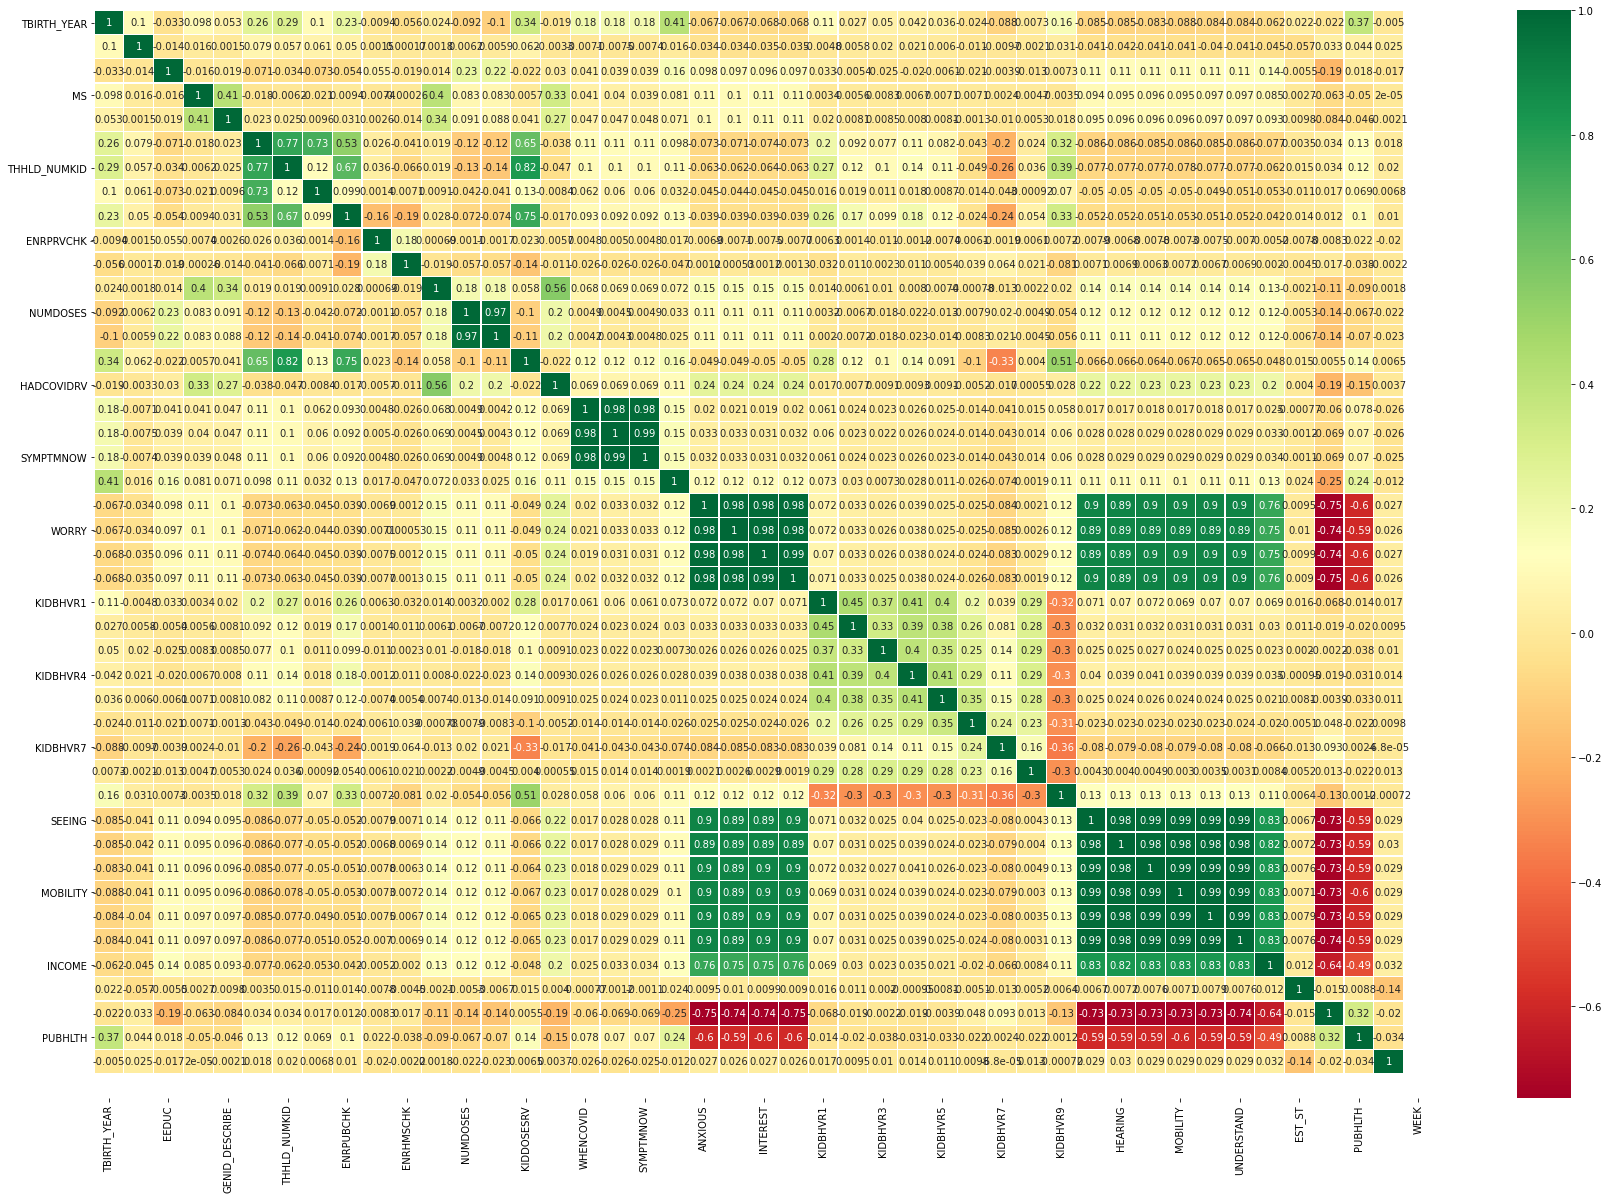

In [8]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
plt.show()

### Data Cleaning & Wrangling

In [9]:
df1.groupby('HADCOVIDRV').count()

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
HADCOVIDRV,,,,,,,,,,,,,,,,,,,,,
-99,486,486,486,486,486,486,486,486,486,486,...,486,486,486,486,486,486,486,486,486,486
-88,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
1,30039,30039,30039,30039,30039,30039,30039,30039,30039,30039,...,30039,30039,30039,30039,30039,30039,30039,30039,30039,30039
2,30587,30587,30587,30587,30587,30587,30587,30587,30587,30587,...,30587,30587,30587,30587,30587,30587,30587,30587,30587,30587


In [10]:
df1.groupby('INCOME').count()

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
INCOME,,,,,,,,,,,,,,,,,,,,,
-99,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,...,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391
-88,9937,9937,9937,9937,9937,9937,9937,9937,9937,9937,...,9937,9937,9937,9937,9937,9937,9937,9937,9937,9937
1,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112,...,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112
2,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271,...,4271,4271,4271,4271,4271,4271,4271,4271,4271,4271
3,5389,5389,5389,5389,5389,5389,5389,5389,5389,5389,...,5389,5389,5389,5389,5389,5389,5389,5389,5389,5389
4,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450,...,8450,8450,8450,8450,8450,8450,8450,8450,8450,8450
5,7243,7243,7243,7243,7243,7243,7243,7243,7243,7243,...,7243,7243,7243,7243,7243,7243,7243,7243,7243,7243
6,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,...,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500
7,4555,4555,4555,4555,4555,4555,4555,4555,4555,4555,...,4555,4555,4555,4555,4555,4555,4555,4555,4555,4555


In [11]:
df1_New = df1[df1.INCOME != -99.0]
df1_New

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


In [12]:
df1_New1 = df1_New[df1_New.INCOME != -88.0]
df1_New1

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


In [13]:
df1_New2 = df1_New1[df1_New1.HADCOVIDRV != -88.0]
df1_New2

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


In [14]:
df1_Final= df1_New2[df1_New2.GENID_DESCRIBE != -99.0]
df1_Final

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


In [15]:
df1_Final= df1_New2[df1_New2.HADCOVIDRV != -99.0]
df1_Final

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
0,1973,1,7,1,1,4,0,4,-88,-88,...,1,1,1,1,6,34,1,2,1,51
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
2,1975,1,7,1,2,5,3,2,1,-99,...,2,1,1,1,8,51,1,2,2,51
3,1986,1,7,1,2,3,1,2,-99,-99,...,2,1,1,1,6,20,1,2,3,51
4,1948,1,5,1,1,2,0,2,-88,-88,...,2,2,2,2,5,1,1,1,2,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61448,1960,1,5,1,1,2,0,2,-88,-88,...,1,1,1,1,7,37,1,2,2,51
61449,1972,1,6,1,2,2,0,2,-88,-88,...,1,1,1,1,8,36,1,2,1,51
61450,1979,1,6,1,2,2,0,2,-88,-88,...,2,2,1,1,8,51,1,2,2,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


In [16]:
df1_Final.groupby('HADCOVIDRV').count()

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
HADCOVIDRV,,,,,,,,,,,,,,,,,,,,,
1,24632,24632,24632,24632,24632,24632,24632,24632,24632,24632,...,24632,24632,24632,24632,24632,24632,24632,24632,24632,24632
2,25366,25366,25366,25366,25366,25366,25366,25366,25366,25366,...,25366,25366,25366,25366,25366,25366,25366,25366,25366,25366


In [17]:
df1_Final.groupby('INCOME').count()

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
INCOME,,,,,,,,,,,,,,,,,,,,,
1,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092
2,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254,...,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254
3,5370,5370,5370,5370,5370,5370,5370,5370,5370,5370,...,5370,5370,5370,5370,5370,5370,5370,5370,5370,5370
4,8426,8426,8426,8426,8426,8426,8426,8426,8426,8426,...,8426,8426,8426,8426,8426,8426,8426,8426,8426,8426
5,7226,7226,7226,7226,7226,7226,7226,7226,7226,7226,...,7226,7226,7226,7226,7226,7226,7226,7226,7226,7226
6,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,...,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483
7,4550,4550,4550,4550,4550,4550,4550,4550,4550,4550,...,4550,4550,4550,4550,4550,4550,4550,4550,4550,4550
8,5597,5597,5597,5597,5597,5597,5597,5597,5597,5597,...,5597,5597,5597,5597,5597,5597,5597,5597,5597,5597


In [18]:
df1_West=(df1_Final.loc[df1_Final['EST_ST'].isin([2,4,6,8,15,16,30,32,35,41,49,53,56])])
df1_West

,TBIRTH_YEAR,RRACE,EEDUC,MS,GENID_DESCRIBE,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,ENRPUBCHK,ENRPRVCHK,...,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION,WEEK
1,1945,1,6,3,2,1,0,1,-88,-88,...,2,1,1,1,2,8,1,1,4,51
6,1940,1,6,2,2,1,0,1,-88,-88,...,2,2,1,1,3,15,2,1,4,51
8,1967,1,7,3,2,3,1,2,-99,-99,...,2,1,1,1,6,41,1,2,4,51
16,1958,1,4,1,2,2,0,2,-88,-88,...,2,1,1,1,6,6,1,2,4,51
23,1972,1,4,1,2,4,0,4,-88,-88,...,1,1,1,1,7,16,1,2,4,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61442,1957,1,6,1,1,3,0,3,-88,-88,...,1,1,1,1,8,6,2,1,4,51
61443,1951,3,6,2,2,3,0,3,-88,-88,...,1,1,1,1,4,6,1,1,4,51
61445,1969,2,3,1,2,2,0,2,-88,-88,...,1,3,1,1,4,4,1,2,4,51
61451,1984,1,6,1,2,3,1,2,-99,-99,...,1,1,1,1,7,41,1,2,4,51


#### Data Visualization 

<AxesSubplot:xlabel='HADCOVIDRV', ylabel='Count'>

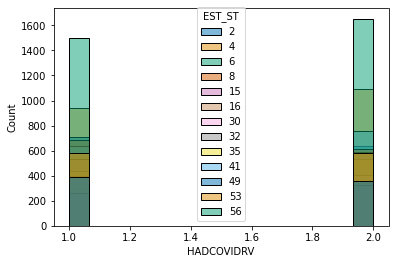

In [19]:
sns.histplot(data=df1_West,x=df1_West['HADCOVIDRV'],hue=df1_West['EST_ST'],palette = 'colorblind')

<AxesSubplot:xlabel='HADCOVIDRV', ylabel='INCOME'>

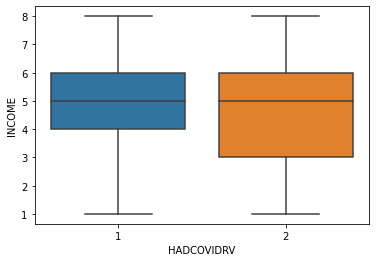

In [20]:
sns.boxplot(x="HADCOVIDRV", y="INCOME", data=df1_West)

<AxesSubplot:xlabel='INCOME', ylabel='EST_ST'>

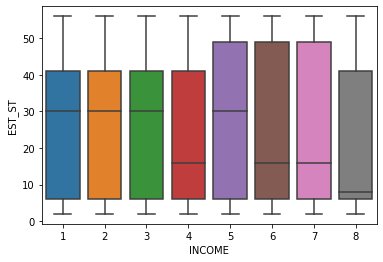

In [21]:
sns.boxplot(x="INCOME", y="EST_ST", data=df1_West)

<AxesSubplot:xlabel='HADCOVIDRV', ylabel='TBIRTH_YEAR'>

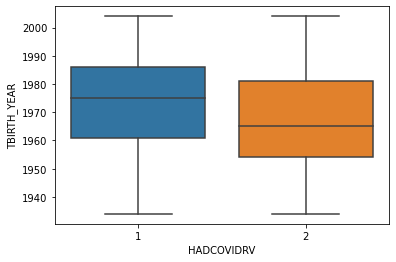

In [22]:
sns.boxplot(data=df1_West,x="HADCOVIDRV",y="TBIRTH_YEAR")



In [23]:
df1_Final['AGE']=(2022-df1_Final.TBIRTH_YEAR)
df1_Final['AGE'] = pd.to_numeric(df1_Final['AGE'])

<ipython-input-23-9d64a15f1bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_Final['AGE']=(2022-df1_Final.TBIRTH_YEAR)
<ipython-input-23-9d64a15f1bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_Final['AGE'] = pd.to_numeric(df1_Final['AGE'])


In [24]:
df1_Final['AGE']

0        49
1        77
2        47
3        36
4        74
         ..
61448    62
61449    50
61450    43
61451    38
61452    52
Name: AGE, Length: 49998, dtype: int64

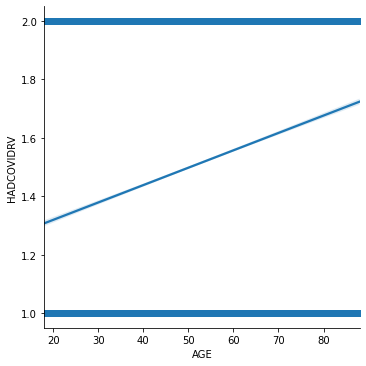

In [25]:
sns.lmplot(data=df1_Final, x="AGE", y="HADCOVIDRV")

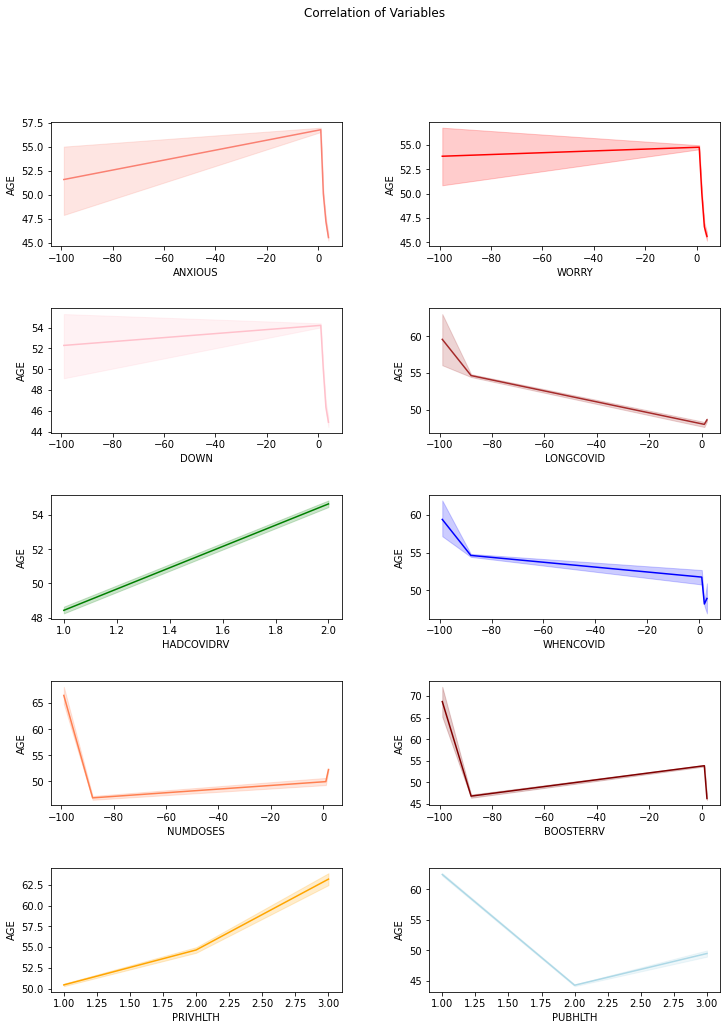

In [26]:
fig, axes = plt.subplots(5,2, figsize = (12, 16))

sns.lineplot(data=df1_Final,ax= axes[0,0],x = 'ANXIOUS', y='AGE', color = 'salmon')
sns.lineplot(data=df1_Final,ax= axes[0,1],x = 'WORRY', y='AGE', color = 'red')
sns.lineplot(data=df1_Final,ax= axes[1,0],x = 'DOWN', y='AGE', color = 'pink')
sns.lineplot(data=df1_Final,ax= axes[1,1],x = 'LONGCOVID', y='AGE', color = 'brown')
sns.lineplot(data=df1_Final,ax= axes[2,0],x = 'HADCOVIDRV', y='AGE', color = 'green')
sns.lineplot(data=df1_Final,ax= axes[2,1],x = 'WHENCOVID', y='AGE', color = 'blue')
sns.lineplot(data=df1_Final,ax= axes[3,0],x = 'NUMDOSES', y='AGE', color = 'coral')
sns.lineplot(data=df1_Final,ax= axes[3,1],x = 'BOOSTERRV', y='AGE', color = 'maroon')
sns.lineplot(data=df1_Final,ax= axes[4,0],x = 'PRIVHLTH', y='AGE', color = 'orange')
sns.lineplot(data=df1_Final,ax= axes[4,1],x = 'PUBHLTH', y='AGE', color = 'lightblue')

plt.suptitle('Correlation of Variables')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5);
#fig.xticks(rotation=90)


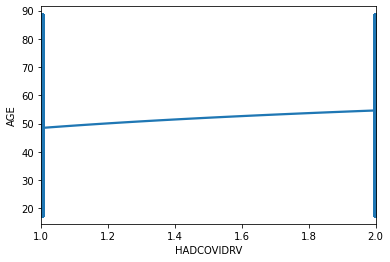

In [27]:
sns.regplot(x="HADCOVIDRV", y="AGE", data=df1_Final, logx=True);

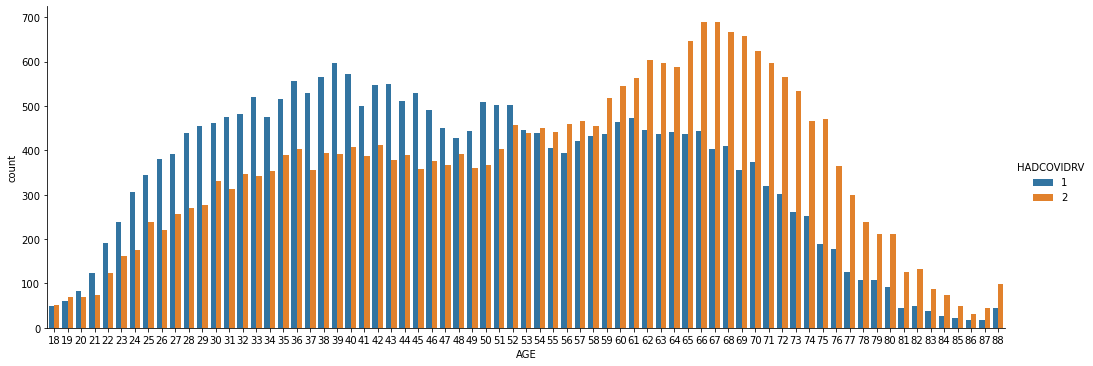

In [28]:
sns.catplot(data=df1_Final, x="AGE", kind = "count",hue= 'HADCOVIDRV',height = 5, aspect = 2.8)

<AxesSubplot:xlabel='REGION', ylabel='MS'>

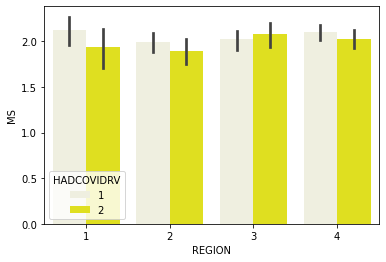

In [29]:
sns.barplot(data=df1_Final,x='REGION', y='MS',hue='HADCOVIDRV',color='yellow')

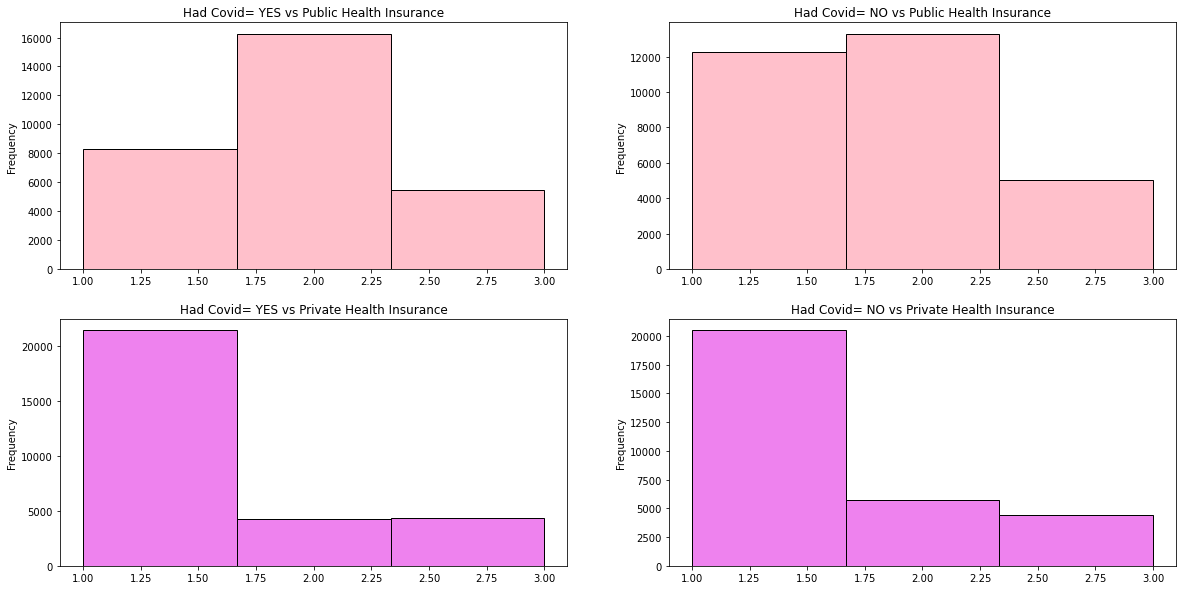

In [30]:
f,ax=plt.subplots(2,2,figsize=(20,10))
df[df['HADCOVIDRV']==1].PUBHLTH.plot.hist(ax=ax[0,0],bins=3,edgecolor='black',color='pink')
ax[0,0].set_title('Had Covid= YES vs Public Health Insurance')

df[df['HADCOVIDRV']==2].PUBHLTH.plot.hist(ax=ax[0,1],bins=3,edgecolor='black',color='pink')
ax[0,1].set_title('Had Covid= NO vs Public Health Insurance')

df[df['HADCOVIDRV']==1].PRIVHLTH.plot.hist(ax=ax[1,0],bins=3,edgecolor='black',color='violet')
ax[1,0].set_title('Had Covid= YES vs Private Health Insurance')

df[df['HADCOVIDRV']==2].PRIVHLTH.plot.hist(ax=ax[1,1],bins=3,edgecolor='black',color='violet')
ax[1,1].set_title('Had Covid= NO vs Private Health Insurance')

plt.show()

In [31]:
df2 = df1_Final[['HADCOVIDRV','GENID_DESCRIBE','RRACE','AGE','ANXIOUS','WORRY','INTEREST','DOWN']]

In [32]:
df2.corr()

,HADCOVIDRV,GENID_DESCRIBE,RRACE,AGE,ANXIOUS,WORRY,INTEREST,DOWN
HADCOVIDRV,1.000000,-0.017403,0.002503,0.192276,-0.016368,-0.015092,-0.004515,-0.010005
GENID_DESCRIBE,-0.017403,1.000000,0.001436,-0.056824,0.036020,0.043212,0.048018,0.045807
RRACE,0.002503,0.001436,1.000000,-0.100667,0.010264,0.011354,0.006607,0.006397
AGE,0.192276,-0.056824,-0.100667,1.000000,-0.065829,-0.045438,-0.031633,-0.038286
ANXIOUS,-0.016368,0.036020,0.010264,-0.065829,1.000000,0.461498,0.440463,0.433920
WORRY,-0.015092,0.043212,0.011354,-0.045438,0.461498,1.000000,0.518471,0.498895
INTEREST,-0.004515,0.048018,0.006607,-0.031633,0.440463,0.518471,1.000000,0.593141
DOWN,-0.010005,0.045807,0.006397,-0.038286,0.433920,0.498895,0.593141,1.000000


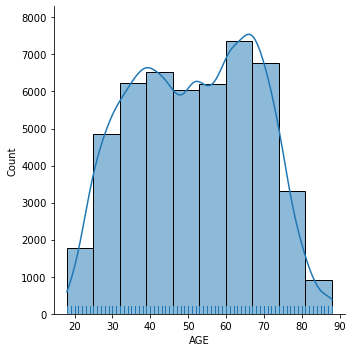

In [33]:
sns.displot(df1_Final['AGE'], kind='hist', bins=10, kde=True, rug=True)

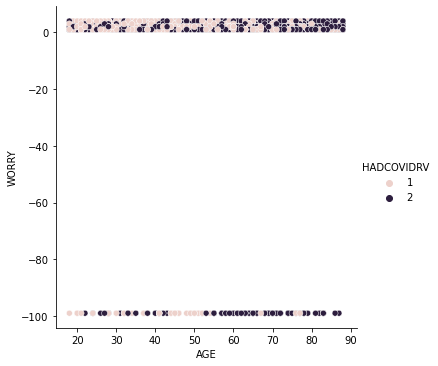

In [34]:
sns.relplot(x="AGE", y="WORRY", hue="HADCOVIDRV", data=df1_Final)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

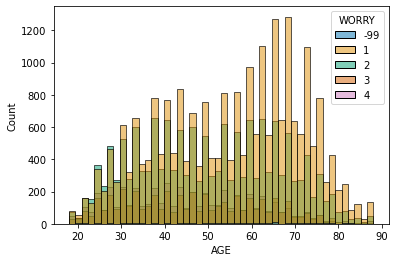

In [35]:
sns.histplot(data=df1_Final,x=df1_Final['AGE'],hue=df1_Final['WORRY'],palette = 'colorblind')

### Model Building

In [36]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
Y=df1_Final.HADCOVIDRV
X=df1_Final.drop(columns=['HADCOVIDRV'])

In [37]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.4, random_state=13)

In [38]:
from sklearn import preprocessing
trainX_scaled=preprocessing.scale(train_X)
testX_scaled=preprocessing.scale(test_X)

In [39]:
knn_param_grid = {'n_neighbors': np.arange(1,22), 'weights':['uniform', 'distance']}

In [40]:
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [41]:
knn_grid_search.fit(trainX_scaled, train_Y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [42]:
knn_grid_search.cv_results_['mean_test_score']

array([-0.01200083, -0.01200083, -0.00955066, -0.00917438, -0.00891172,
       -0.00840172, -0.00866103, -0.00811419, -0.00866861, -0.00809242,
       -0.00882009, -0.00819986, -0.00909046, -0.00842272, -0.00933402,
       -0.00861375, -0.00964638, -0.00886949, -0.00989138, -0.00906545,
       -0.01017263, -0.00929694, -0.01040583, -0.00950276, -0.010669  ,
       -0.0097338 , -0.01092237, -0.0099597 , -0.01111828, -0.01014301,
       -0.01134261, -0.01035442, -0.01150786, -0.01052448, -0.01169374,
       -0.01070427, -0.0118316 , -0.0108605 , -0.01189677, -0.01095282,
       -0.01205438, -0.01111033])

In [43]:
knn_grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [44]:
knn_best_est_model = knn_grid_search.best_estimator_

In [45]:
knn_prediction=knn_best_est_model.predict(trainX_scaled)

In [46]:
knn_predictionY=knn_best_est_model.predict(testX_scaled) 
knn_predictionY

array([2.        , 2.        , 1.        , ..., 2.        , 1.61452473,
       2.        ])

In [47]:
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score


In [48]:
regressionSummary(test_Y, knn_predictionY)


Regression statistics

                      Mean Error (ME) : 0.0043
       Root Mean Squared Error (RMSE) : 0.0881
            Mean Absolute Error (MAE) : 0.0182
          Mean Percentage Error (MPE) : -0.1338
Mean Absolute Percentage Error (MAPE) : 1.2587
